In [88]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

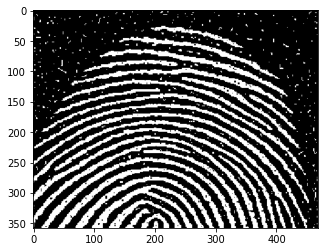

In [89]:
img=cv2.imread('images/morph1.png',0)
plt.imshow(img,cmap='gray')
plt.show()

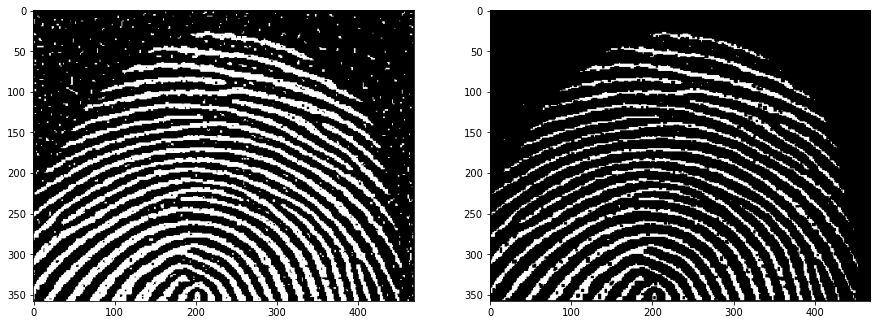

In [90]:
######                       EROSION                        #####

def erosion(img,si):
    si=si*255
    img_pad=np.zeros((img.shape[0]+2,img.shape[1]+2),dtype=np.uint8)
    img_pad[1:img.shape[0]+1,1:img.shape[1]+1]=img
    img_er=np.zeros(img.shape,dtype=np.uint8)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            res=(img_pad[i:i+3,j:j+3] & si)
            res=(res==si)
            if False in res:
                img_er[i,j]=0
            else:
                img_er[i,j]=255
   
    return img_er

si=np.array([[1,1,1],
    [1,1,1],
    [1,1,1]])
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(erosion(img,si),cmap='gray')
plt.show()


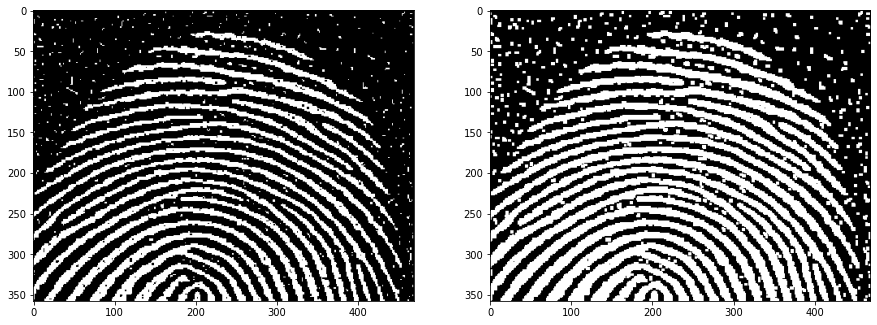

In [91]:
######                       DILATION                        #####

def dilation(img,si):
    si=si*255
    img_pad=np.zeros((img.shape[0]+2,img.shape[1]+2),dtype=np.uint8)
    img_pad[1:img.shape[0]+1,1:img.shape[1]+1]=img
    img_di=np.zeros(img.shape,dtype=np.uint8)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            res=(img_pad[i:i+3,j:j+3] & si)
            res=(res==si)
            if True in res:
                img_di[i,j]=255
            else:
                img_di[i,j]=0
    
    return img_di

si=np.array([[1,1,1],
    [1,1,1],
    [1,1,1]])

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(dilation(img,si),cmap='gray')
plt.show()

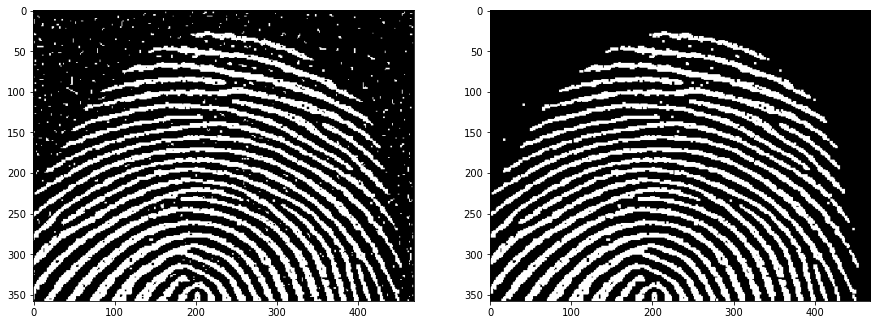

In [92]:
#######                       OPENNING                    ######

si=np.array([[1,1,1],
    [1,1,1],
    [1,1,1]])
op=erosion(img,si)
op=dilation(op,si)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(op,cmap='gray')
plt.show()

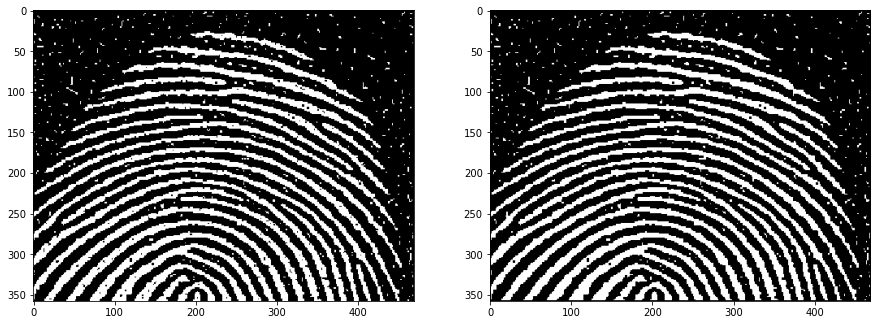

In [93]:
#######                       CLOSING                    ######

si=np.array([[1,1,1],
    [1,1,1],
    [1,1,1]])
op=dilation(img,si)
op=erosion(op,si)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(op,cmap='gray')
plt.show()

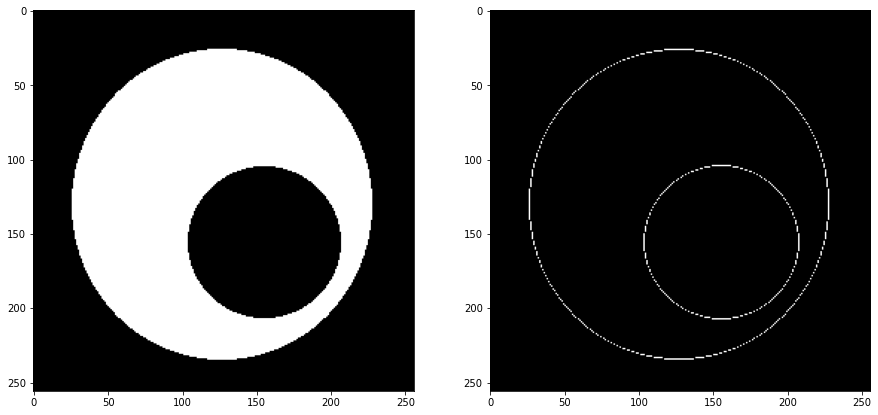

In [116]:
########## HIT AND MISS TRANSFORM   #######################
def con(m1,m2):
    for i in range(3):
        for j in range(3):
            if(m2[i,j]!=2):
                if(m2[i,j]!=m1[i,j]):
                    return False
    return True

def hitandmiss(img,se):
    img_pad=np.zeros((img.shape[0]+2,img.shape[1]+2),dtype=np.uint8)
    img_pad[1:img.shape[0]+1,1:img.shape[1]+1]=img+0
    img_res=np.zeros((img.shape[0],img.shape[1]),dtype=np.uint8)
    img_tmp=img_res+0
    for k in range(len(se)):
        for i in range(0,img.shape[0]):
            for j in range(0,img.shape[1]):
                if(con(img_pad[i:i+3,j:j+3],se[k])==True):
                    img_tmp[i,j]=255
        img_res= img_res | img_tmp
    return img_res
se=[]
se.append(np.array([[2,255,2],[0,255,255],[0,0,2]],dtype=np.uint8))
se.append(np.array([[2,255,2],[255,255,0],[2,0,0]],dtype=np.uint8))
se.append(np.array([[2,0,0],[255,255,0],[2,255,2]],dtype=np.uint8))
se.append(np.array([[0,0,2],[0,255,255],[2,255,2]],dtype=np.uint8))  
se.append(np.array([[255,255,255],[255,255,255],[0,0,0]],dtype=np.uint8))
se.append(np.array([[0,0,0],[255,255,255],[255,255,255]],dtype=np.uint8))
se.append(np.array([[255,255,0],[255,255,0],[255,255,0]],dtype=np.uint8))
se.append(np.array([[0,255,255],[0,255,255],[0,255,255]],dtype=np.uint8))  
im=cv2.imread("images/art7.png",0)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(hitandmiss(im,kernel),cmap='gray')
plt.show()

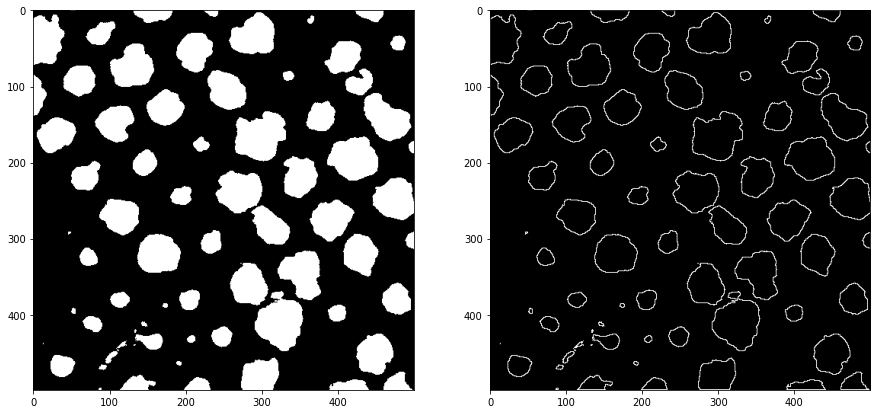

In [95]:
################### BOUNDARY EXTRACTION #######################3
def boundaryextraction(img,se):
    img_tmp=erosion(img,se)
    return img-img_tmp
se=np.array([[1,1,1],[1,1,1],[1,1,1]],dtype=np.uint8)
im=cv2.imread("images/morph.png",0)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.subplot(1,2,2)
boundary=boundaryextraction(im,se)
plt.imshow(boundary,cmap='gray')
plt.show()

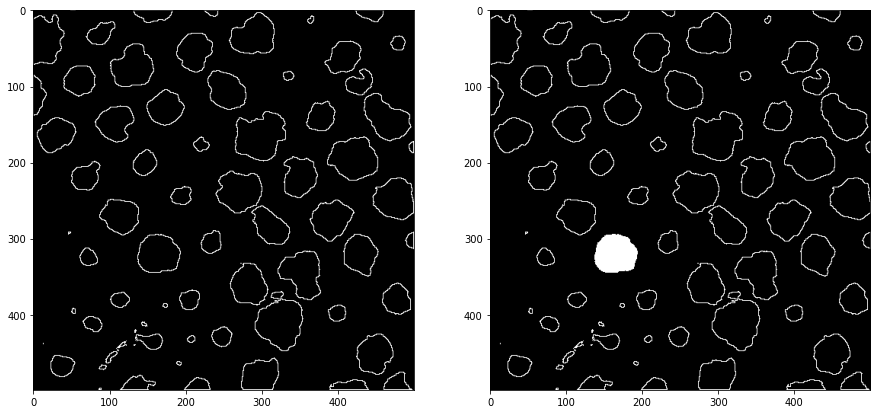

In [96]:
############## hole filling ############
def holefilling(img,se,x,y):
    com=255-img
    im_res=np.zeros(img.shape,dtype=np.uint8)
    im_tmp=im_res+0
    im_res[x,y]=255
    while(False in (im_tmp==im_res)):
        im_tmp=im_res+0
        im_res=dilation(im_tmp,se)
        im_res=im_res & com
    return im_res | img
se=np.array([[1,1,1],[1,1,1],[1,1,1]],dtype=np.uint8)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(boundary,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(holefilling(boundary,se,320,160),cmap='gray')
plt.show()

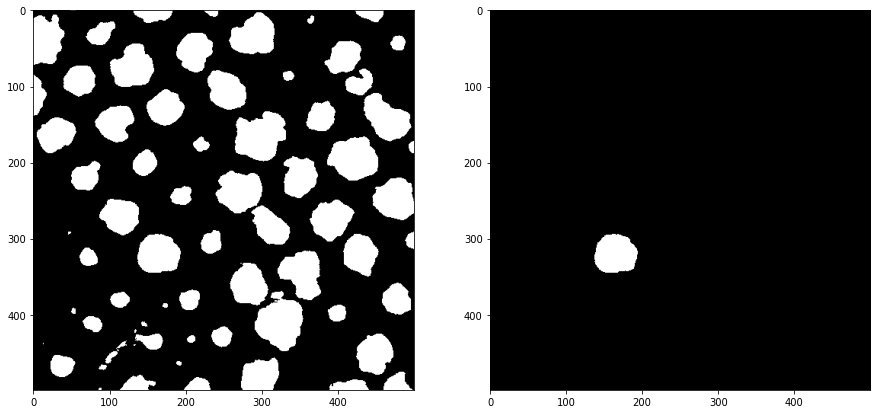

In [104]:
################# CONNECTED COMPONENT EXTRACTION ######################
def connectedcomponent(img,se,x,y):
    im_res=np.zeros(img.shape,dtype=np.uint8)
    im_tmp=im_res+0
    im_res[x,y]=255
    while(False in (im_tmp==im_res)):
        im_tmp=im_res+0
        im_res=dilation(im_tmp,se)
        im_res=im_res & img    
    return im_res
se=np.array([[1,1,1],[1,1,1],[1,1,1]],dtype=np.uint8)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(connectedcomponent(im,se,320,160),cmap='gray')
plt.show()

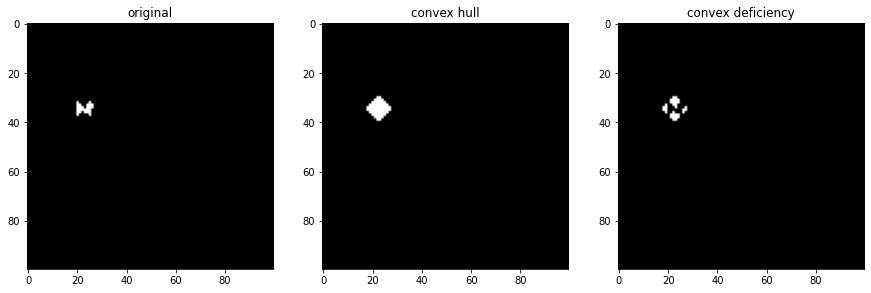

In [137]:
############ CONVEX HULL #############
def convexhull(img):
    img_tmp=np.zeros(img.shape,dtype=np.uint8)
    img_ret=img_tmp+0
    img_res=img+0
    se=[]
    se.append(np.array([[255,2,2],[255,0,2],[255,2,2]],dtype=np.uint8))
    se.append(np.array([[255,255,255],[2,0,2],[2,2,2]],dtype=np.uint8))
    se.append(np.array([[2,2,255],[2,0,255],[2,2,255]],dtype=np.uint8))
    se.append(np.array([[2,2,2],[2,0,2],[255,255,255]],dtype=np.uint8))
    for k in se:
        while(False in (img_tmp==img_res)):
            img_tmp=img_res+0
            img_res=hitandmiss(img_tmp,[k])
            img_res=img_res | img_tmp
        img_ret=img_ret | img_res
        img_tmp=np.zeros(img.shape,dtype=np.uint8)
        img_res=img+0
    return img_ret
im1=cv2.imread("images/convex_hull.png",0)
im_convex=convexhull(im1)
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title("original")
plt.imshow(im1,cmap='gray')
plt.subplot(1,3,2)
plt.title("convex hull")
plt.imshow(im_convex,cmap='gray')
plt.subplot(1,3,3)
plt.title("convex deficiency")
plt.imshow(im_convex-im1,cmap='gray')
plt.show()

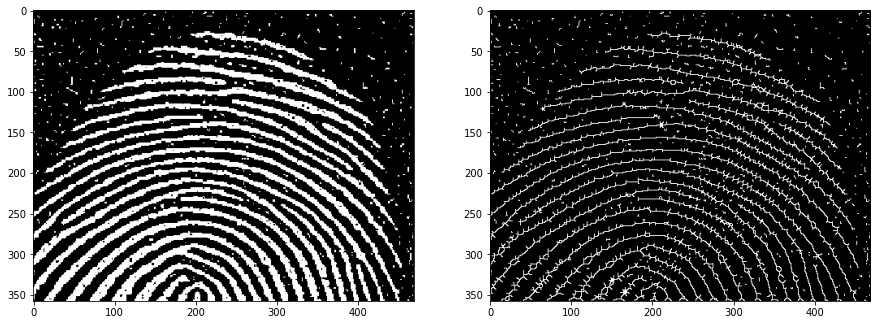

In [148]:
                                ############ THINNING ##################
def thinning(img):
    se=[]
    se.append(np.array([[0,0,0],[2,255,2],[255,255,255]],dtype=np.uint8))
    se.append(np.array([[2,0,0],[255,255,0],[255,255,2]],dtype=np.uint8))
    se.append(np.array([[255,2,0],[255,255,0],[255,2,0]],dtype=np.uint8))
    se.append(np.array([[255,255,2],[255,255,0],[2,0,0]],dtype=np.uint8))  
    se.append(np.array([[255,255,255],[2,255,2],[0,0,0]],dtype=np.uint8))
    se.append(np.array([[2,255,255],[0,255,255],[0,0,2]],dtype=np.uint8))
    se.append(np.array([[0,2,255],[0,255,255],[0,2,255]],dtype=np.uint8))
    se.append(np.array([[0,0,2],[0,255,255],[2,255,255]],dtype=np.uint8))
    img_res=img+0
    img_tmp=np.zeros(img.shape,dtype=np.uint8)
    while(False in (img_tmp==img_res)):
        img_tmp=img_res+0
        for k in se:
            img_res=img_res-hitandmiss(img_res,[k])
    return img_res
thin_origin=cv2.imread("images/morph1.png",0)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(thin_origin,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(thinning(thin_origin),cmap='gray')
plt.show()

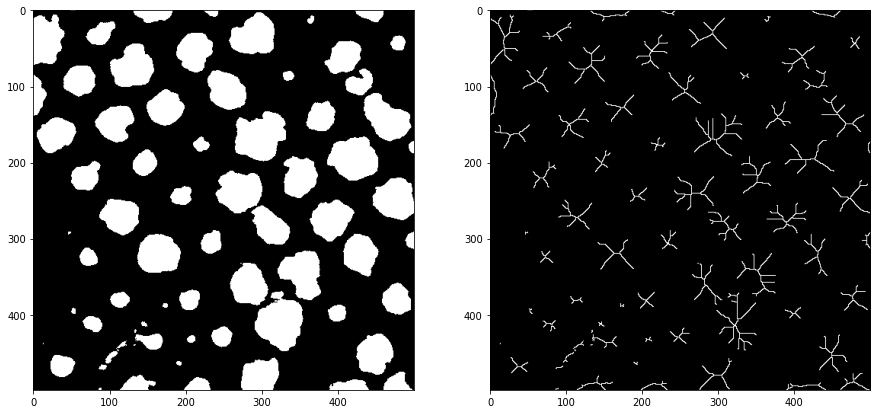

In [150]:
thin_origin=cv2.imread("images/morph.png",0)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(thin_origin,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(thinning(thin_origin),cmap='gray')
plt.show()

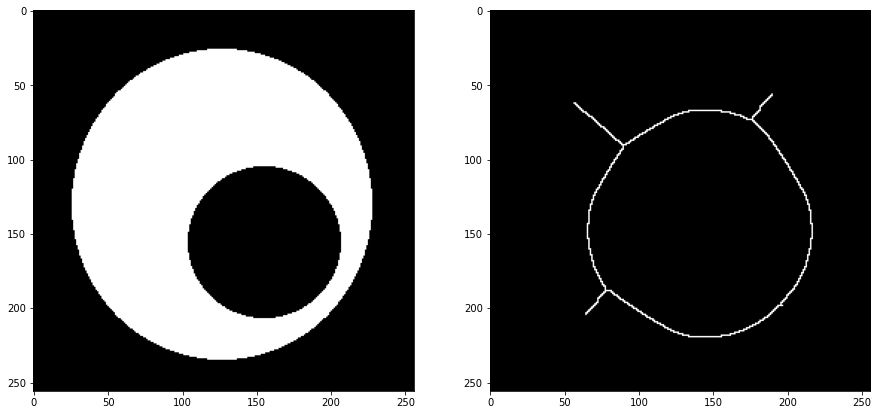

In [152]:
thin_origin=cv2.imread("images/art7.png",0)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(thin_origin,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(thinning(thin_origin),cmap='gray')
plt.show()

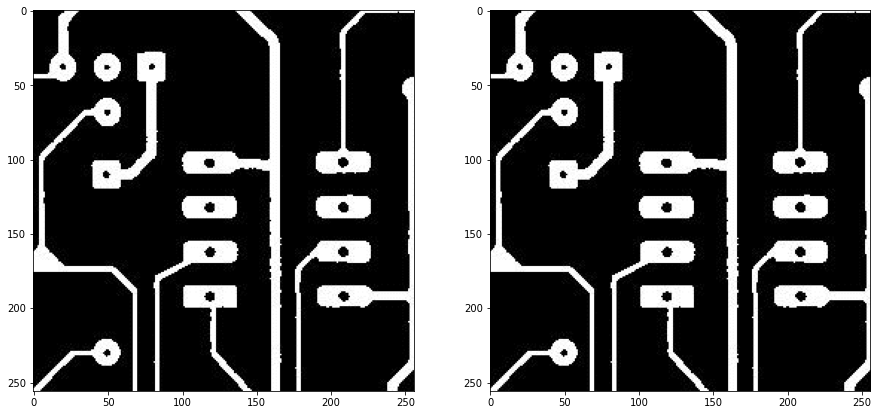

In [157]:
                                    ############ THICKENING ##################
def thickening(img):
    se=[]
    se.append(np.array([[0,0,0],[2,255,2],[255,255,255]],dtype=np.uint8))
    se.append(np.array([[2,0,0],[255,255,0],[255,255,2]],dtype=np.uint8))
    se.append(np.array([[255,2,0],[255,255,0],[255,2,0]],dtype=np.uint8))
    se.append(np.array([[255,255,2],[255,255,0],[2,0,0]],dtype=np.uint8))  
    se.append(np.array([[255,255,255],[2,255,2],[0,0,0]],dtype=np.uint8))
    se.append(np.array([[2,255,255],[0,255,255],[0,0,2]],dtype=np.uint8))
    se.append(np.array([[0,2,255],[0,255,255],[0,2,255]],dtype=np.uint8))
    se.append(np.array([[0,0,2],[0,255,255],[2,255,255]],dtype=np.uint8))
    img_res=img+0
    img_tmp=np.zeros(img.shape,dtype=np.uint8)
    while(False in (img_tmp==img_res)):
        img_tmp=img_res+0
        for k in se:
            img_res=img_res | hitandmiss(img_res,[k])
    return img_res
thin_origin=cv2.imread("images/circuits.png",0)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(thin_origin,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(thickening(thin_origin),cmap='gray')
plt.show()